## Import and load

In [1]:
import pandas as pd
from T_data_loader import *

In [2]:
#Names of columns for the data CMU
NAMES_MOVIES = ['Wikipedia_movie_ID','Freebase_movie_ID','Movie_name','Movie_release_date','Movie_box_office_revenue','Movie_runtime','Movie_languages','Movie_countries','Movie_genres']

In [3]:
df_CMU_movies = csv_loader('movie.metadata', 'CMU', column_names=NAMES_MOVIES)

In [4]:
df_IMDb = pd.read_pickle('IMDb/IMDb.pkl')

<Axes: >

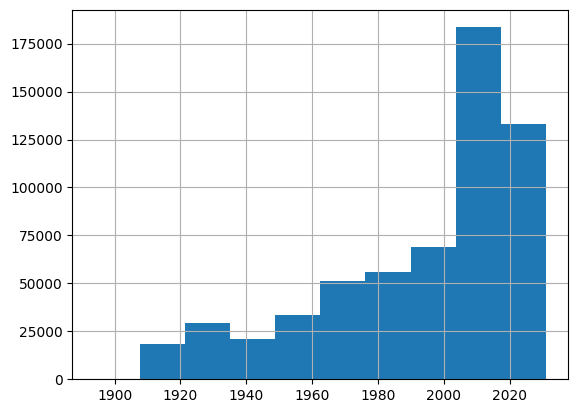

In [53]:
df_IMDb['realease_date'].hist()

In [60]:
df_CMU_movies.query('Movie_release_date<1910').shape

(344, 10)

In [61]:
df_IMDb.query('realease_date<1910').shape

(202, 105)

## Trying to get an unique index

In [5]:
df_CMU_movies["Movie_release_date"]=pd.to_datetime(df_CMU_movies["Movie_release_date"], format='mixed', errors='coerce').dt.year.astype('Int64')

In [6]:
df_IMDb['realease_date']=pd.to_datetime(df_IMDb['realease_date'], format='mixed', errors='coerce').dt.year.astype('Int64')

In [7]:
df_CMU_movies_modified_title = df_CMU_movies.Movie_name.str.replace(r'[^\w\s]', '', regex=True).str.replace(r'\s+', '', regex=True).str.lower()
df_CMU_movies["modified_title"]=df_CMU_movies_modified_title

In [8]:
df_IMDb_modified_title = df_IMDb.Primary_title.str.replace(r'[^\w\s]', '', regex=True).str.replace(r'\s+', '', regex=True).str.lower()
df_IMDb["modified_title"]=df_IMDb_modified_title

In [9]:
df_IMDb["runtime"] = pd.to_numeric(df_IMDb["runtime"], errors='coerce').round(0).astype('Int64')
df_CMU_movies["Movie_runtime"] = pd.to_numeric(df_CMU_movies["Movie_runtime"], errors='coerce').round(0).astype('Int64')

How much Data we are losing with new indexing (2 alternatives) : 

CUM :

In [10]:
df_CMU_movies.shape

(81741, 10)

In [11]:
test1_data_set = df_CMU_movies.dropna(subset=['Movie_release_date','Movie_runtime'])
test2_data_set = df_CMU_movies.dropna(subset=['Movie_release_date'])

In [12]:
print(test1_data_set.shape)
print(test2_data_set.shape)

(58630, 10)
(74838, 10)


In [13]:
new_id1 = test1_data_set.Movie_release_date.astype(str)+test1_data_set.Movie_runtime.astype(str)+test1_data_set.modified_title
new_id2 = test2_data_set.Movie_release_date.astype(str)+test2_data_set.modified_title

In [14]:
df_CMU_movies_newind1 = test1_data_set.copy()
df_CMU_movies_newind1.index = new_id1

duplicate_indices = df_CMU_movies_newind1.index.value_counts()
indices_with_dupl1 = duplicate_indices[duplicate_indices > 1].index
result = df_CMU_movies_newind1.loc[df_CMU_movies_newind1.index.isin(indices_with_dupl1)]
result.shape

(22, 10)

In [15]:
df_CMU_movies_newind2 = test2_data_set.copy()
df_CMU_movies_newind2.index = new_id2

duplicate_indices = df_CMU_movies_newind2.index.value_counts()
indices_with_dupl2 = duplicate_indices[duplicate_indices > 1].index
result = df_CMU_movies_newind2.loc[df_CMU_movies_newind2.index.isin(indices_with_dupl2)]
result.shape

(275, 10)

In [16]:
CMU_test1 = df_CMU_movies_newind1.loc[~df_CMU_movies_newind1.index.isin(indices_with_dupl1)]
CMU_test2 = df_CMU_movies_newind2.loc[~df_CMU_movies_newind2.index.isin(indices_with_dupl2)]

In [17]:
print(CMU_test1.shape)
print(CMU_test2.shape)

(58608, 10)
(74563, 10)


IMDb :

In [18]:
df_IMDb.shape

(696856, 105)

In [19]:
test1IMDb_data_set = df_IMDb.dropna(subset=['realease_date','runtime'])
test2IMDb_data_set = df_IMDb.dropna(subset=['realease_date'])

In [20]:
print(test1IMDb_data_set.shape)
print(test2IMDb_data_set.shape)

(431091, 105)
(595363, 105)


In [21]:
new_id1_IMDb = test1IMDb_data_set.realease_date.astype(str)+test1IMDb_data_set.runtime.astype(str)+test1IMDb_data_set.modified_title
new_id2_IMDb = test2IMDb_data_set.realease_date.astype(str)+test2IMDb_data_set.modified_title

In [22]:
df_IMDb_movies_newind1 = test1IMDb_data_set.copy()
df_IMDb_movies_newind1.index = new_id1_IMDb

duplicate_indices = df_IMDb_movies_newind1.index.value_counts()
indices_with_dupl1 = duplicate_indices[duplicate_indices > 1].index
result = df_IMDb_movies_newind1.loc[df_IMDb_movies_newind1.index.isin(indices_with_dupl1)]
result.shape

(663, 105)

In [23]:
df_IMDb_movies_newind2 = test2IMDb_data_set.copy()
df_IMDb_movies_newind2.index = new_id2_IMDb

duplicate_indices = df_IMDb_movies_newind2.index.value_counts()
indices_with_dupl2 = duplicate_indices[duplicate_indices > 1].index
result = df_IMDb_movies_newind2.loc[df_IMDb_movies_newind2.index.isin(indices_with_dupl2)]
result.shape

(11114, 105)

In [24]:
IMDb_test1 = df_IMDb_movies_newind1.loc[~df_IMDb_movies_newind1.index.isin(indices_with_dupl1)]
IMDb_test2 = df_IMDb_movies_newind2.loc[~df_IMDb_movies_newind2.index.isin(indices_with_dupl2)]

In [25]:
print(IMDb_test1.shape)
print(IMDb_test2.shape)

(430428, 105)
(584249, 105)


Merging IMDb and CMU :

1) Release date + name :

In [31]:
merged2 = IMDb_test2.merge(CMU_test2, left_index=True, right_index=True, how='inner')

In [32]:
merged2.shape

(44866, 115)

2. Release date + runtime + name :

In [33]:
merged1 = IMDb_test1.merge(CMU_test1, left_index=True, right_index=True, how='inner')

In [34]:
merged1.shape

(23260, 115)

From 1), using original title :

In [38]:
notmatched_CMU = CMU_test2[~CMU_test2.index.isin(IMDb_test2.index)]
notmatched_IMDb = IMDb_test2[~IMDb_test2.index.isin(CMU_test2.index)]
print(notmatched_IMDb.shape)
print(notmatched_CMU.shape)

(539383, 105)
(29697, 10)


In [40]:
notmatched_IMDb = notmatched_IMDb.drop(columns=["modified_title"])
df_IMDb_modified_titlev2 = notmatched_IMDb.Original_title.str.replace(r'[^\w\s]', '', regex=True).str.replace(r'\s+', '', regex=True).str.lower()
notmatched_IMDb["modified_title"]=df_IMDb_modified_titlev2

In [41]:
new_id2_IMDbv2 = notmatched_IMDb.realease_date.astype(str)+notmatched_IMDb.modified_title

In [42]:
notmatched_IMDb_newind = notmatched_IMDb.copy()
notmatched_IMDb_newind.index = new_id2_IMDbv2

duplicate_indices = notmatched_IMDb_newind.index.value_counts()
indices_with_duplv2 = duplicate_indices[duplicate_indices > 1].index
result = notmatched_IMDb_newind.loc[notmatched_IMDb_newind.index.isin(indices_with_duplv2)]
result.shape

(438, 105)

In [43]:
IMDb_notmatched_newind = notmatched_IMDb_newind.loc[~notmatched_IMDb_newind.index.isin(indices_with_duplv2)]

In [44]:
merged2v2 = IMDb_notmatched_newind.merge(notmatched_CMU, left_index=True, right_index=True, how='inner')

In [45]:
merged2v2.shape

(3074, 115)

In [46]:
merged2v2.head()

,IMDb_title_ID,Director0,Director1,Director2,Director3,Director4,Director5,Director6,Director7,Director8,...,Wikipedia_movie_ID,Freebase_movie_ID,Movie_name,Movie_release_date,Movie_box_office_revenue,Movie_runtime,Movie_languages,Movie_countries,Movie_genres,modified_title_y
1907lenfantprodigue,tt0000591,Michel Carré,None,None,None,None,None,None,None,None,...,4849466,/m/07s67rr,L'Enfant prodigue,1907,NaN,90,"{""/m/064_8sq"": ""French Language""}","{""/m/0f8l9c"": ""France""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",lenfantprodigue
1911captainmidnightthebushking,tt0001530,Alfred Rolfe,None,None,None,None,None,None,None,None,...,32987200,/m/0h569x9,"Captain Midnight, the Bush King",1911,NaN,<NA>,"{""/m/06ppq"": ""Silent film""}",{},"{""/m/06ppq"": ""Silent film""}",captainmidnightthebushking
1911thelifeofrufusdawes,tt0001731,Alfred Rolfe,None,None,None,None,None,None,None,None,...,32987279,/m/0h534h8,The Life of Rufus Dawes,1911,NaN,<NA>,"{""/m/06ppq"": ""Silent film""}","{""/m/0chghy"": ""Australia""}","{""/m/06ppq"": ""Silent film""}",thelifeofrufusdawes
1911sweetnellofolddrury,tt0001911,Raymond Longford,None,None,None,None,None,None,None,None,...,32895030,/m/0h3xvly,Sweet Nell of Old Drury,1911,NaN,<NA>,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...",{},"{""/m/06ppq"": ""Silent film""}",sweetnellofolddrury
1911linferno,tt0002130,Francesco BertoliniGiuseppe de Liguoro,None,None,None,None,None,None,None,None,...,2502728,/m/07jcl5,L'Inferno,1911,NaN,68,"{""/m/06ppq"": ""Silent film""}","{""/m/03rjj"": ""Italy""}","{""/m/06ppq"": ""Silent film"", ""/m/03k9fj"": ""Adve...",linferno


In [47]:
merged_final = pd.concat([merged2,merged2v2])

In [48]:
merged_final.index.is_unique

True

In [49]:
merged_final.shape

(47940, 115)

Encoire pas de match :

In [51]:
notmatched_CMU2 = notmatched_CMU[~notmatched_CMU.index.isin(IMDb_notmatched_newind.index)]
notmatched_IMDb2 = IMDb_notmatched_newind[~IMDb_notmatched_newind.index.isin(notmatched_CMU.index)]

In [52]:
print(notmatched_IMDb2.shape)
print(notmatched_CMU2.shape)

(535871, 105)
(26623, 10)
